In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import somoclu
%matplotlib inline 

In [3]:
# Our data
dataset = pd.read_csv('BeijingPM20100101_20151231.csv')
X = dataset.iloc[:, 1:]
del X['cbwd']

X = X.dropna()
print(X)

       year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
27824  2013      3    5     8       1      117.0          166.0   
27825  2013      3    5     9       1      131.0          165.0   
27826  2013      3    5    10       1      141.0          173.0   
27828  2013      3    5    12       1      169.0          182.0   
27829  2013      3    5    13       1      169.0          169.0   
27830  2013      3    5    14       1      174.0          183.0   
27831  2013      3    5    15       1      194.0          195.0   
27832  2013      3    5    16       1      208.0          212.0   
27833  2013      3    5    17       1      213.0          207.0   
27834  2013      3    5    18       1      203.0          198.0   
27835  2013      3    5    19       1      209.0          216.0   
27836  2013      3    5    20       1      222.0          256.0   
27837  2013      3    5    21       1      228.0          263.0   
27838  2013      3    5    22       1      227.0          269.

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print(np.shape(X))

(19062, 16)


/home/valyay/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
n_rows, n_columns = 25,25
som = somoclu.Somoclu(n_columns, n_rows, data=X, maptype="planar")
%time som.train(epochs=1000,radius0=20, radiusN=1,radiuscooling="exponential",scale0=0.1, scaleN=0.035, scalecooling="exponential")

CPU times: user 12min 28s, sys: 1.41 s, total: 12min 29s
Wall time: 3min 39s


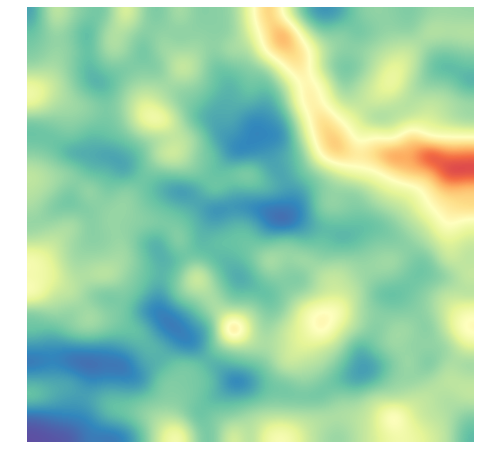

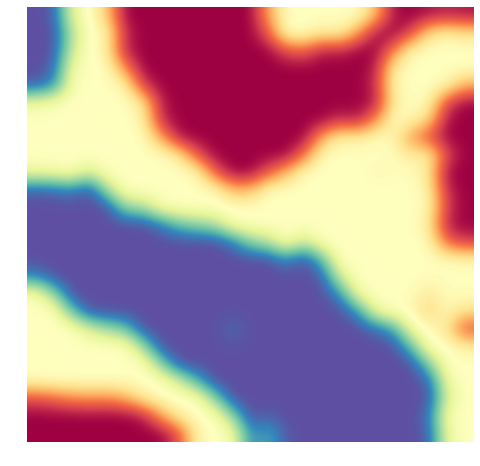

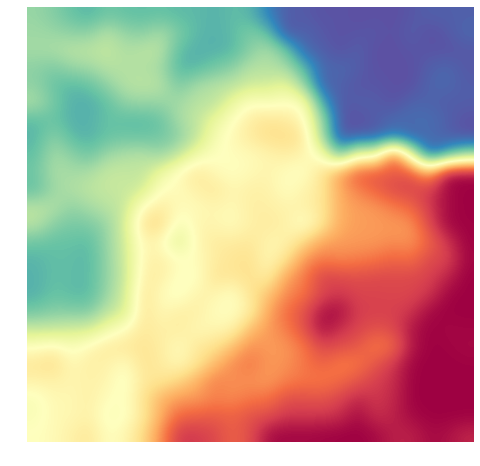

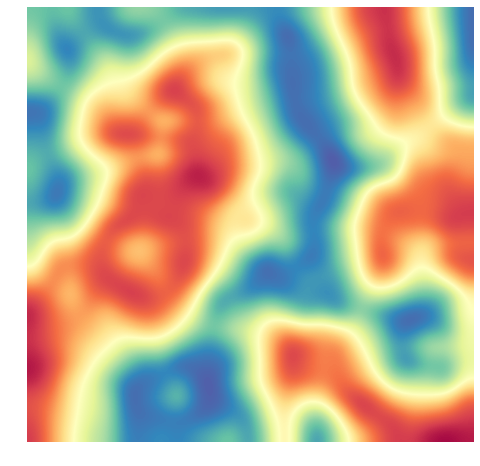

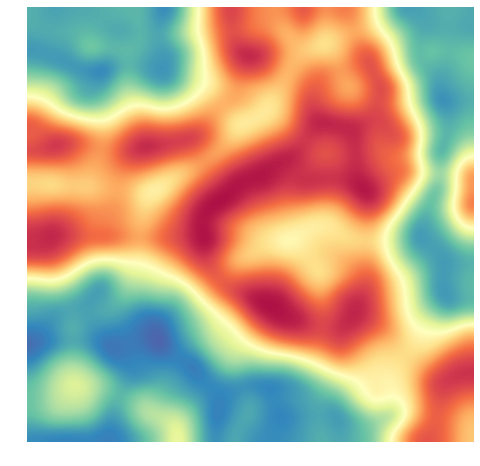

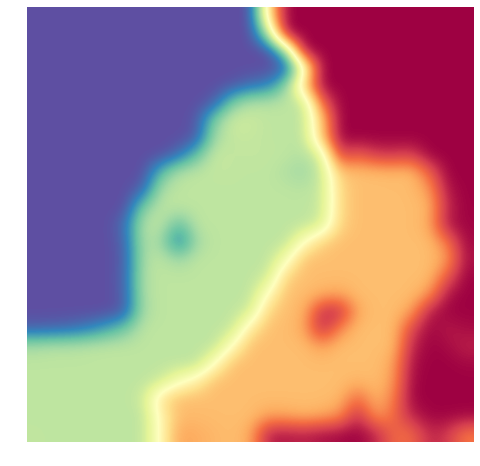

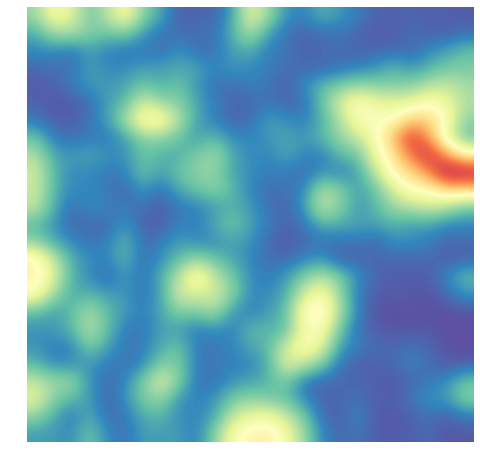

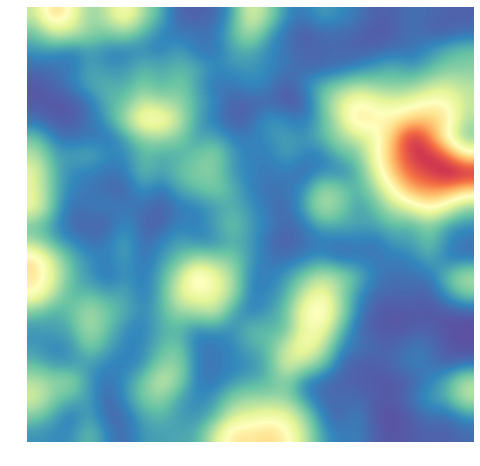

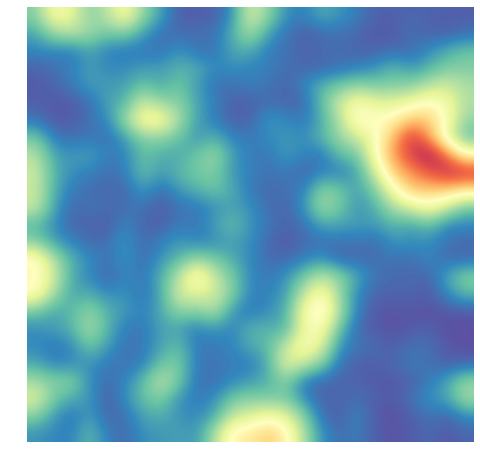

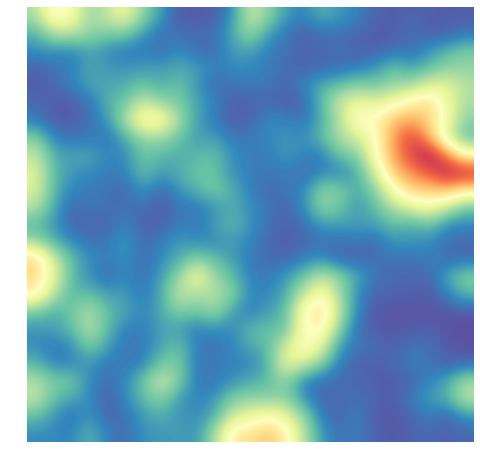

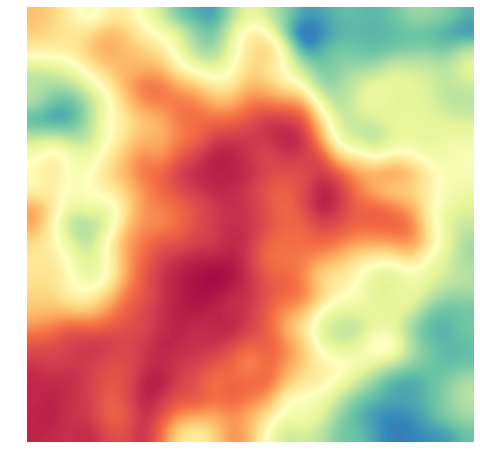

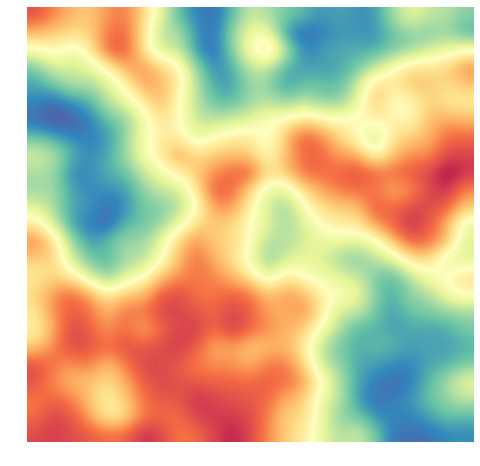

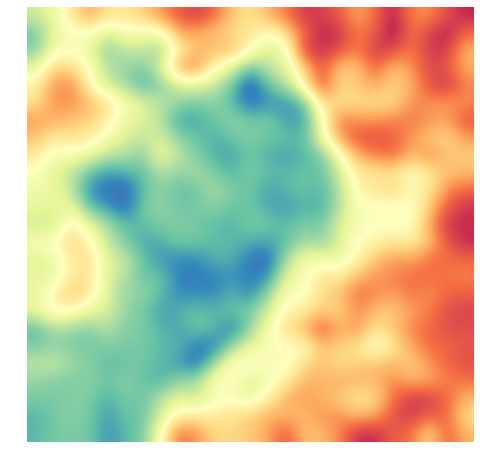

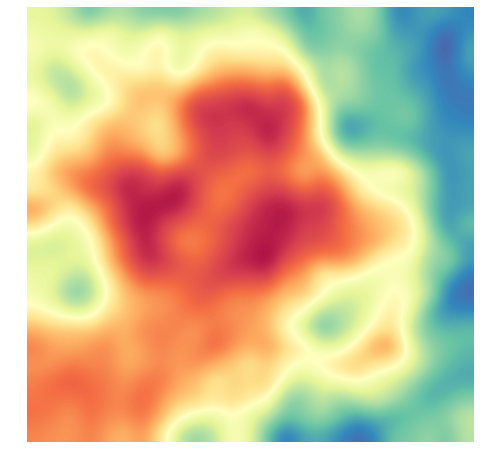

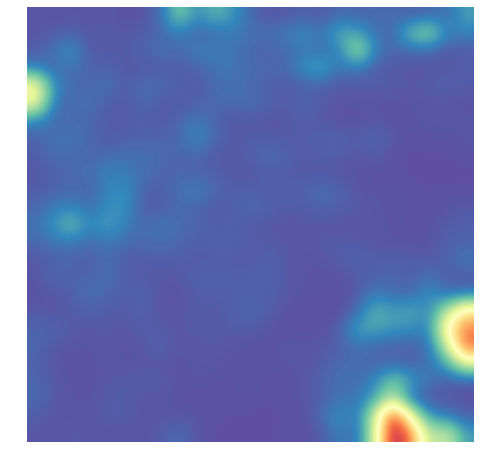

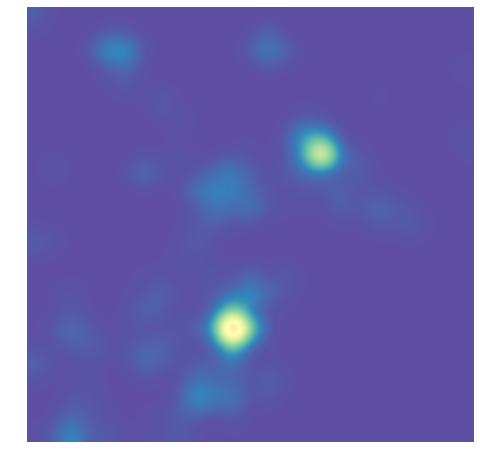

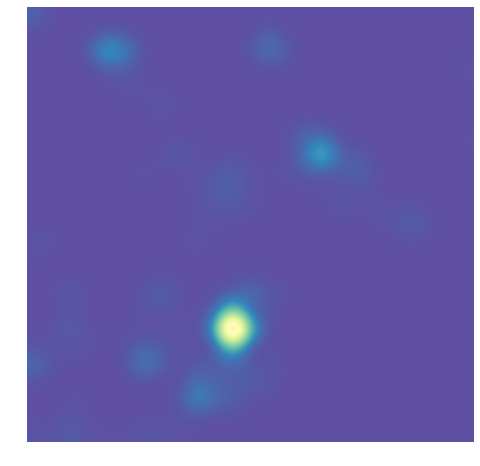

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [6]:
som.view_umatrix()
som.view_component_planes()

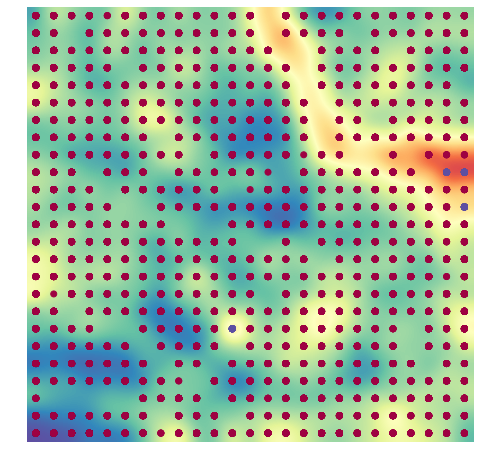

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [7]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

In [8]:
%time som.train(epochs=31250,radius0=1,radiusN=0.000001,radiuscooling="exponential",scale0=0.035, scaleN=0.001, scalecooling="exponential")

CPU times: user 6h 1min 10s, sys: 21.1 s, total: 6h 1min 31s
Wall time: 1h 39min 44s


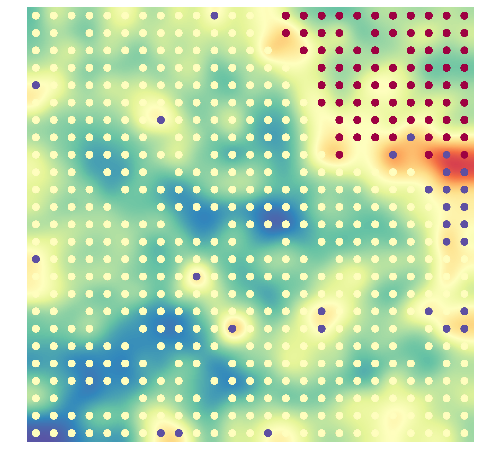

<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [10]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)